# This notebook calculates the normal vector for every coastline grid cell 

In [158]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters') # directory

In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tqdm import tqdm

In [160]:
# load classification CSV:
numerical_df = pd.read_csv('cell_geo_type2.csv')

In [161]:
np.shape(classification_df)

(521, 1440)

In [162]:
# Define a function to calculate the normal vector angle
def calculate_normal_vector_angle(matrix):
    
    # define direction vectors for the 8 surrounding cells
    directions = [(-1, -1), (-1, 0), (-1, 1),(0, -1), 
                  (0, 1), (1, -1), (1, 0), (1, 1)]
    
    normal_x = 0
    normal_y = 0

    for (dy, dx), value in zip(directions, matrix.flatten()):
        if value == 1:
            normal_x += dx
            normal_y += dy
        elif value == 0:
            normal_x -= dx
            normal_y -= dy
    
    # calculate the angle in degrees
    angle = np.degrees(np.arctan2(normal_y, normal_x)) % 360
    return angle

# initialize lists
positions = []
u = []
v = []

# for each row
for i in tqdm(range(1, numerical_df.shape[0] - 1)):
    # for each column
    for j in range(1, numerical_df.shape[1] - 1):
        if numerical_df.iat[i, j] == 2:
            
            # get 3x3 matrix around current grid cell
            matrix = numerical_df.iloc[i-1:i+2, j-1:j+2].values
            
            # calculate the angle of the normal vector
            angle = calculate_normal_vector_angle(matrix)
            
            # store the position and the vector components
            positions.append((i, j))
            u.append(np.cos(np.radians(angle)))
            v.append(np.sin(np.radians(angle)))

100%|██████████| 68/68 [00:00<00:00, 144.38it/s]


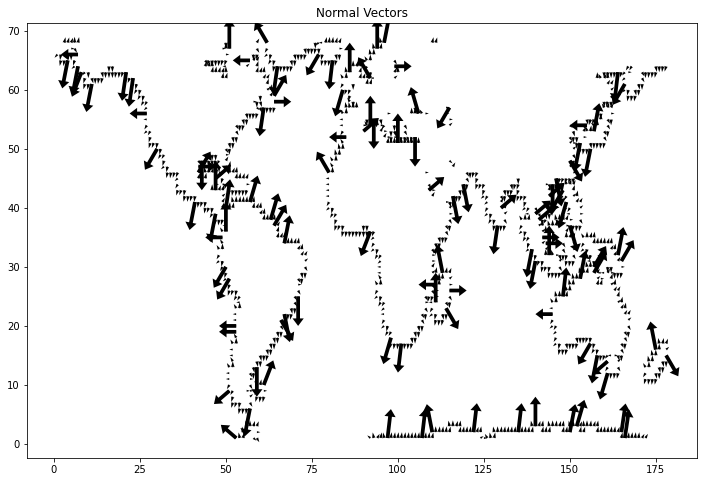

In [178]:
# convert positions to X and Y arrays
positions = np.array(positions)
X, Y = positions[:, 1], positions[:, 0]

# convert u and v to numpy arrays
u = np.array(u)
v = np.array(v)

# plot the vectors using plt.quiver
plt.figure(figsize=(12, 8))
plt.quiver(X, Y, u, v, angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver(X[::10], Y[::10], u[::10], v[::10], angles = 'xy', scale_units = 'xy', scale = 0.2, headlength = 2, headaxislength=2)
plt.title('Normal Vectors')
#plt.xlim(25,75)
#plt.ylim(5,50)
plt.show()